<a href="https://colab.research.google.com/github/TalkingSweetPotatoes/DemoDay/blob/master/%EA%B0%80%EA%B2%A9%EA%B4%80%EB%A0%A8%ED%81%AC%EB%A1%A4%EB%A7%81_%EA%B3%A0%EA%B5%AC%EB%A7%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup


url = "https://mini.snu.kr/index.php/cafe/set/2010-"
url_list= []
day31 = [1, 3, 5, 7, 8, 10, 12]
day30 = [4, 6, 9, 11]
for i in range(1, 13):
    if i in day31:
        for to31 in range(1, 32):
            url_list.append(url + str(i) + '-' + str(to31) + '/abcf')
    elif i in day30:
        for to30 in range(1, 31):
            url_list.append(url + str(i) + '-' + str(to30) + '/abcf')
    elif i==2:
        for to28 in range(1, 29):
            url_list.append(url + str(i) + '-' + str(to28) + '/abcf')


In [ ]:
menu2010 = []
for url in url_list:
    req = requests.get(url)
    html = req.text
    soup = BeautifulSoup(html, 'html.parser')

    menu = soup.find_all('td', {'class' : 'menu'})
    menu_list = []
    for a in menu:
        menu_list.append(a.get_text())
    for b in menu_list:
        if '휴무' in b or '휴업'in b or '휴점' in b or '공휴일' in b or '개교기념일' in b or '코로나'in b or '공간'in b or '●' in b or '누텔라와플' in b or '유니짜장' in b or '능이버섯' in b or '교직원식당' in b:
            None
        else:
          menu2010.append(b)

menu2010

In [ ]:
import re

my_str = ' '.join(menu2010)

findprice = re.compile('[0-9]+')
price = findprice.findall(my_str)

k=0
for p2010 in range(0, len(price)):
  k+=int(price[p2010])

from collections import Counter

ave_2010 = k/len(price) #2019년 학식 가격 평균


pricecounter= Counter(price)
print(round(ave_2010, 2)*100, pricecounter)

2719.0 Counter({'25': 3106, '30': 2969, '17': 793, '40': 252, '35': 227, '45': 87})


2010년 가격을 긁었는데 코드가 길어져 함수를 만들어보기로 함

In [ ]:
# url 만들어주는 함수
import requests
from bs4 import BeautifulSoup

def makeurl(x):
  url = "https://mini.snu.kr/index.php/cafe/set/" + str(x) + "-"
  url_list = []
  day31 = [1, 3, 5, 7, 8, 10, 12]
  day30 = [4, 6, 9, 11]
  for i in range(1, 13):
      if i in day31:
        for to31 in range(1, 32):
          url_list.append(url + str(i) + '-' + str(to31) + '/abcf')
      elif i in day30:
        for to30 in range(1, 31):
          url_list.append(url + str(i) + '-' + str(to30) + '/abcf')
      elif i==2:
        for to28 in range(1, 29):
          url_list.append(url + str(i) + '-' + str(to28) + '/abcf')
        if x % 4 == 0:
          url_list.append(url + str(i) + '-' + str(29) + '/abcf')
  return(url_list)

In [ ]:
url2011 = makeurl(2011)
url2012 = makeurl(2012)
url2013 = makeurl(2013)
url2014 = makeurl(2014)
url2015 = makeurl(2015)
url2016 = makeurl(2016)
url2017 = makeurl(2017)
url2018 = makeurl(2018)
url2019 = makeurl(2019)

In [ ]:
def crawlmenu(x): # x에 url2013같은거 넣으면 됨(url리스트 만들어놨으니까)
  menu_list = []
  for url in x:
    req = requests.get(url)
    html = req.text
    soup = BeautifulSoup(html, 'html.parser')

    menu = soup.find_all('td', {'class' : 'menu'})
    for a in menu:
      b = a.get_text()
      if '휴무' in b or '휴업'in b or '휴점' in b or '공휴일' in b or '개교기념일' in b or '코로나'in b or '공간'in b or '●' in b or '누텔라와플' in b or '유니짜장' in b or '능이버섯' in b or '교직원식당' in b:
        None
      else:
        menu_list.append(b)
  return menu_list

In [ ]:
menu2011 = crawlmenu(url2011)
menu2012 = crawlmenu(url2012)
menu2013 = crawlmenu(url2013)
menu2014 = crawlmenu(url2014)
menu2015 = crawlmenu(url2015)
menu2016 = crawlmenu(url2016)
menu2017 = crawlmenu(url2017)
menu2018 = crawlmenu(url2018)
menu2019 = crawlmenu(url2019)

In [ ]:
# menu20**을 txt파일로 저장(/content/sample_data에 있음)
# 다시 불러올 때에는 여기를 참고 https://opentutorials.org/module/2980/17643

import sys
sys.stdout = open('menu2019.txt','w')
 
print(menu2019)

In [ ]:
with open('menu2019.txt') as data:
    contents19 = data.read()

menu2019_1 = contents19.split(',')

In [ ]:
# 리스트에서 60글자 넘는 값 제거(두레미담, 301푸드코트, 공간 등은 메뉴가 많아 60자가 넘음)
def remove60(x):
  for a in x:
    if len(a) > 60 or '35301' in a or '7500' in a or '30자장면/30사천자장면' in a:
      x.remove(a)

remove60(menu2011)
remove60(menu2012)
remove60(menu2013)
remove60(menu2014)
remove60(menu2015)
remove60(menu2016)
remove60(menu2017)
remove60(menu2018)
remove60(menu2019)

# menu2019에서 ~~가 들어가는거 찾기(버그 수정용)
for f20 in menu2019:
  if '65' in f20:
    print(f20)

In [ ]:
# menu2019에서 ~~가 들어가는거 찾기(버그 수정용)
for f20 in menu2019_1:
  if '17' in f20:
    print(f20)

In [ ]:
import re
from collections import Counter

def price(x):  # x에 crawlmenu(makeurl(년도))가 들어가야 함
  my_str = ' '.join(x)

  findprice = re.compile('[0-9]+')
  price = findprice.findall(my_str)

  price_list = []
  for p in price:
    if int(p) < 65 and int(p) > 20:
      price_list.append(int(p))

  k=0
  for i in range(0, len(price_list)):
      k+=price_list[i]

  average =round(k/len(price_list), 2) # 학식 가격 평균 소수점 2자리까지

  pricecounter= Counter(price_list)
  return [int(average*100), pricecounter]

In [ ]:
price2010 = [int(round(ave_2010, 2)*100), pricecounter]
price2011 = price(menu2011)
price2012 = price(menu2012)
price2013 = price(menu2013)
price2014 = price(menu2014)
price2015 = price(menu2015)
price2016 = price(menu2016)
price2017 = price(menu2017)
price2018 = price(menu2018)
price2019 = price(menu2019)

print('2010년', price2010)
print('2011년', price2011)
print('2012년', price2012)
print('2013년', price2013)
print('2014년', price2014)
print('2015년', price2015)
print('2016년', price2016)
print('2017년', price2017)
print('2018년', price2018)
print('2019년', price2019)

2010년 [2719, Counter({'25': 3106, '30': 2969, '17': 793, '40': 252, '35': 227, '45': 87})]
2011년 [2888, Counter({30: 3955, 25: 2975, 45: 244, 35: 231, 40: 159})]
2012년 [2914, Counter({30: 4163, 25: 2917, 35: 295, 40: 269, 45: 243})]
2013년 [2955, Counter({30: 4077, 25: 2371, 40: 337, 35: 329, 45: 235})]
2014년 [3003, Counter({30: 4051, 25: 2031, 40: 630, 35: 285, 45: 176})]
2015년 [3022, Counter({30: 3184, 25: 1478, 40: 737, 35: 115, 45: 44})]
2016년 [3083, Counter({30: 2910, 25: 1075, 40: 821, 35: 152, 50: 23, 45: 6})]
2017년 [3069, Counter({30: 2758, 25: 1028, 40: 769, 35: 129, 50: 1, 45: 1})]
2018년 [3163, Counter({30: 2587, 40: 979, 25: 760, 35: 316})]
2019년 [3315, Counter({30: 2228, 40: 972, 25: 490, 35: 423, 55: 145, 50: 23})]


In [ ]:
dict2010 = {25: 3106, 30: 2969, 35: 227, 40: 252, 45: 87, 50: np.nan, 55: np.nan}
dict2011 = {25: 2975, 30: 3955, 35: 231, 40: 159, 45: 244, 50: np.nan, 55: np.nan}
dict2012 = {25: 2917, 30: 4163, 35: 295, 40: 269, 45: 243, 50: np.nan, 55: np.nan}
dict2013 = {25: 2371, 30: 4077, 35: 329 ,40: 337, 45: 235, 50: np.nan, 55: np.nan}
dict2014 = {25: 2031, 30: 4051, 35: 285, 40: 630, 45: 176, 50: np.nan, 55: np.nan}
dict2015 = {25: 1478, 30: 3184, 35: 115, 40: 737, 45: 44, 50: np.nan, 55: np.nan}
dict2016 = {25: 1075, 30: 2910, 35: 152, 40: 821, 45: 6, 50: 23, 55: np.nan}
dict2017 = {25: 1028, 30: 2758, 35: 129, 40: 769, 45: 1, 50: 1, 55: np.nan}
dict2018 = {25: 760, 30: 2587, 35: 316, 40: 979, 45: np.nan, 50: np.nan, 55: np.nan}
dict2019 = {25: 490, 30: 2228, 35: 423, 40: 972, 45: np.nan, 50: 23, 55: 145}

In [ ]:
def makedf(x): # x에 dict2010같은거 넣기~
  a = x.keys()
  b = x.values()
  df = pd.DataFrame([x for x in zip(a, b)])
  df1 = df.sort_values(by= 1, ascending = False)
  return df1

df1 = makedf(dict2010)
df2 = makedf(dict2011)
df3 = makedf(dict2012)
df4 = makedf(dict2013)
df5 = makedf(dict2014)
df6 = makedf(dict2015)
df7 = makedf(dict2016)
df8 = makedf(dict2017)
df9 = makedf(dict2018)
df10 = makedf(dict2019)

df1[2]=df2[1]
df1[3]=df3[1]
df1[4]=df4[1]
df1[5]=df5[1]
df1[6]=df6[1]
df1[7]=df7[1]
df1[8]=df8[1]
df1[9]=df9[1]
df1[10]=df10[1]
df1

,0,1,2,3,4,5,6,7,8,9,10
0,25,3106.0,2975.0,2917.0,2371.0,2031.0,1478.0,1075.0,1028.0,760.0,490.0
1,30,2969.0,3955.0,4163.0,4077.0,4051.0,3184.0,2910.0,2758.0,2587.0,2228.0
3,40,252.0,159.0,269.0,337.0,630.0,737.0,821.0,769.0,979.0,972.0
2,35,227.0,231.0,295.0,329.0,285.0,115.0,152.0,129.0,316.0,423.0
4,45,87.0,244.0,243.0,235.0,176.0,44.0,6.0,1.0,NaN,NaN
5,50,NaN,NaN,NaN,NaN,NaN,NaN,23.0,1.0,NaN,23.0
6,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0


No handles with labels found to put in legend.


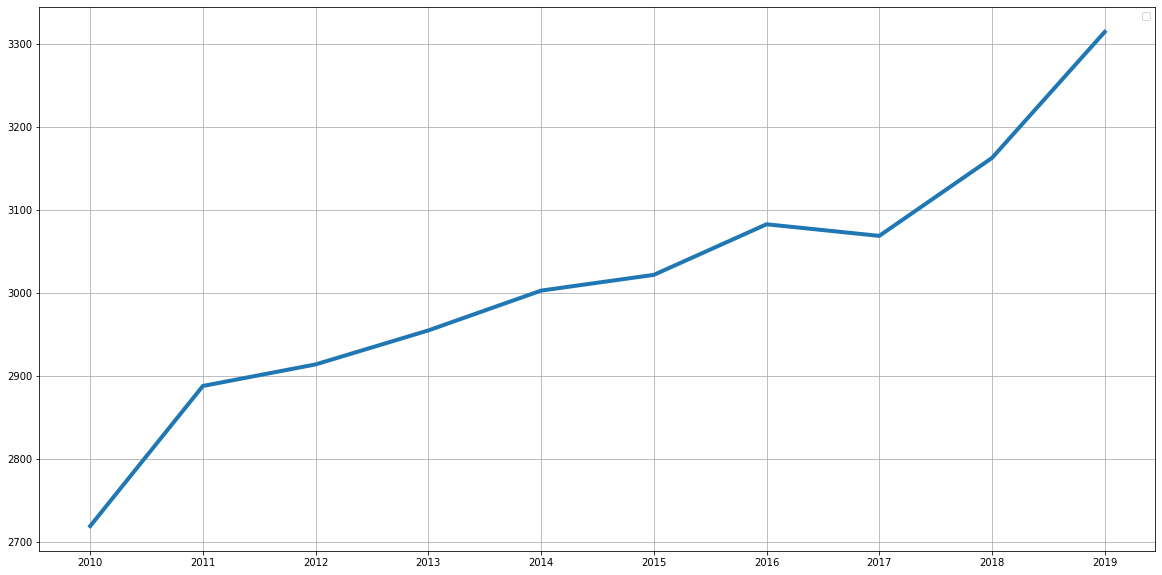

In [ ]:
average_list = [price2010[0], price2011[0], price2012[0], price2013[0], price2014[0], price2015[0], price2016[0], price2017[0], price2018[0], price2019[0]]

t = np.arange(2010, 2020)
plt.plot(t, average_list)
plt.xticks(np.arange(2010, 2020))
plt.legend()

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

plt.show()

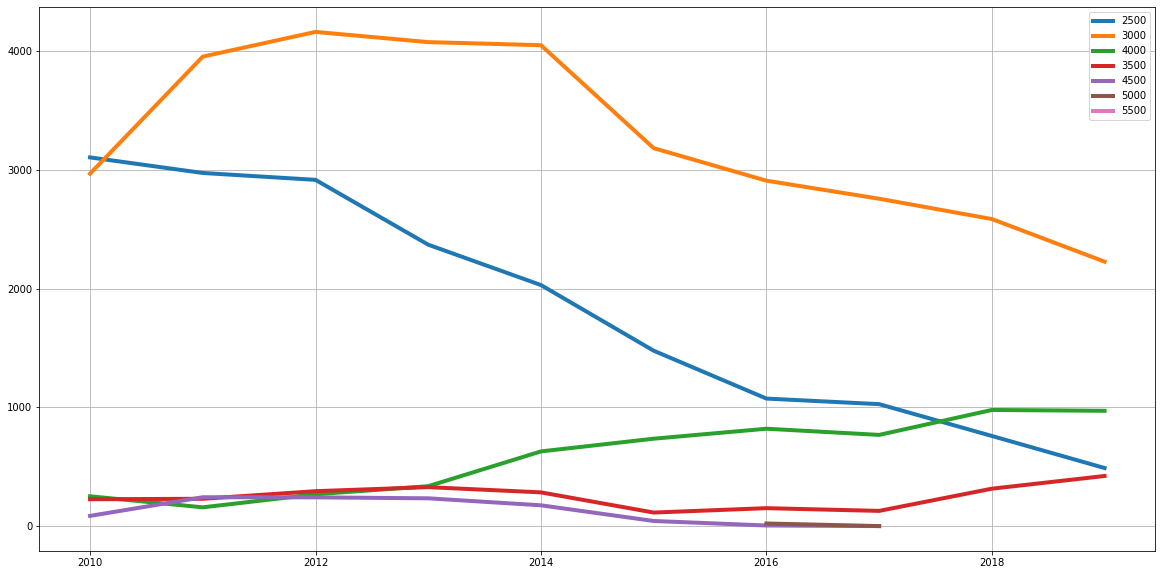

In [ ]:
# df1.set_index(0,inplace=True) # 런타임 초기화됐을 때 주석 풀기

from matplotlib import pyplot as plt

t = np.arange(2010, 2020)

plt.plot(t, df1.iloc[0], label='2500')
plt.plot(t, df1.iloc[1], label='3000')
plt.plot(t, df1.iloc[2], label='4000')
plt.plot(t, df1.iloc[3], label='3500')
plt.plot(t, df1.iloc[4], label='4500')
plt.plot(t, df1.iloc[5], label='5000')
plt.plot(t, df1.iloc[6], label='5500')
plt.legend()

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

plt.show()

In [ ]:
# y가격의 메뉴들만 가져오는 함수~
def menubyprice(x, y): # x에 문자열, y에 가격 넣기(contents19, 17)
  findmenu = re.compile(str(y) + '\s?[가-힣]+&?[가-힣]*')
  x_menu = findmenu.findall(x)

  # 위의 x_menu는 가격+메뉴이기 때문에 메뉴만 다시 뽑아야 함
  final = ' '.join(x_menu)
  ban_num = re.compile('[가-힣]+&?[가-힣]*')
  return_menu = ban_num.findall(final)

  return return_menu

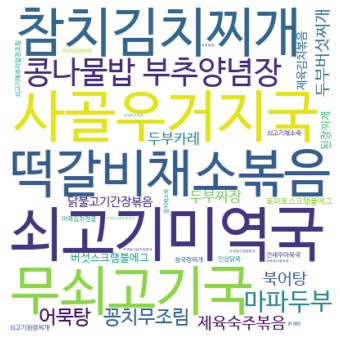

None


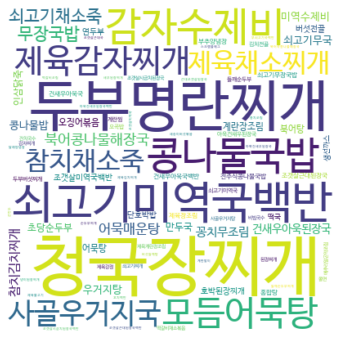

None


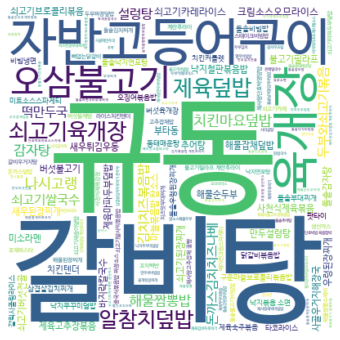

None


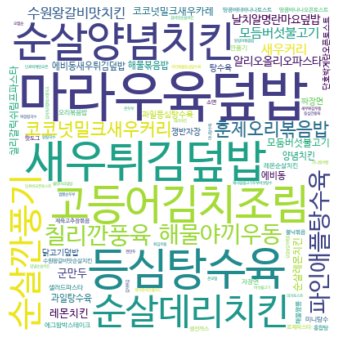

None


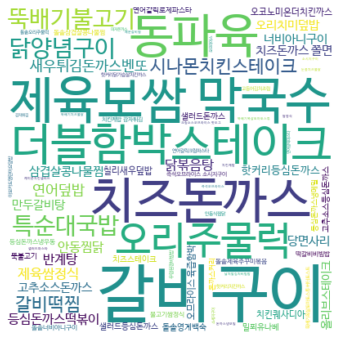

None


In [ ]:
#!pip3 install -q wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한국어 형태소 분석을 위해 konlpy활용 
#!pip3 install -q konlpy
#!apt -qq -y install fonts-nanum
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

from konlpy.tag import Okt
okt = Okt()

from collections import Counter

# 편한 워드클라우드 생성을 위해 함수로 만듦
def makecloud(x): # x에 menubyprice(contents19, 17) 이런거 넣기
  text = ','.join(x)
  wc_text = okt.nouns(text)
  wc_count = Counter(wc_text)

  # 워드 클라우드 속성들 설정!
  wordcloud = WordCloud(
    width = 400,
    height = 400,
    font_path = font_path,
    background_color="white",
  )
  wc = wordcloud.generate_from_text(text)

  array = wc.to_array()
  fig = plt.figure(figsize=(6, 6))
  plt.imshow(array, interpolation="bilinear")
  plt.axis("off")
  plt.show()

# 한번에 워드클라우드를 모두 만들기 위해 반복문에 넣음(앞에서 만든 함수 활용)
list_of_menubypricelist = [menubyprice(contents19, 17), menubyprice(contents19, 25), menubyprice(contents19, 30), menubyprice(contents19, 35), menubyprice(contents19, 40)]
for menu in list_of_menubypricelist:
  print(makecloud(menu))

